In [1]:
import pandas as pd


In [23]:
df = pd.read_csv('Data\CCD_PM1.csv')

In [24]:
df

,GRIMM,ATMOS,Purple Air,Alphasense
0,32.85,30.5,54.230,9.390
1,34.10,32.0,57.350,9.665
2,34.05,32.0,60.095,9.756
3,33.55,31.5,61.990,10.079
4,33.35,32.0,62.855,9.957
...,...,...,...,...
113,26.65,26.0,48.015,5.644
114,26.80,27.5,47.790,5.821
115,26.45,28.0,46.940,5.782
116,26.75,27.0,48.385,5.757


In [25]:
from sklearn.linear_model import LinearRegression
lr_atmos = LinearRegression().fit(df['ATMOS'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_pa = LinearRegression().fit(df['Purple Air'].to_numpy().reshape(-1,1), df['GRIMM'])
lr_n3 = LinearRegression().fit(df['Alphasense'].to_numpy().reshape(-1,1), df['GRIMM'])

In [26]:
df['corrected_atmos'] = lr_atmos.predict(df['ATMOS'].to_numpy().reshape(-1,1))
df['corrected_pa'] = lr_pa.predict(df['Purple Air'].to_numpy().reshape(-1,1))
df['corrected_n3'] = lr_n3.predict(df['Alphasense'].to_numpy().reshape(-1,1))

C:\Users\hitan\AppData\Local\Temp\ipykernel_28508\2737163121.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)


<Axes: >

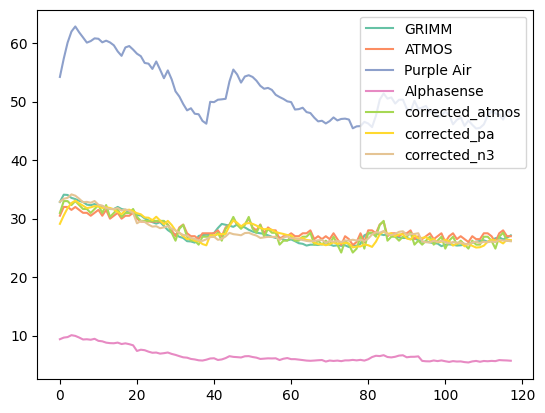

In [27]:
import seaborn as sns

sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)

<Axes: >

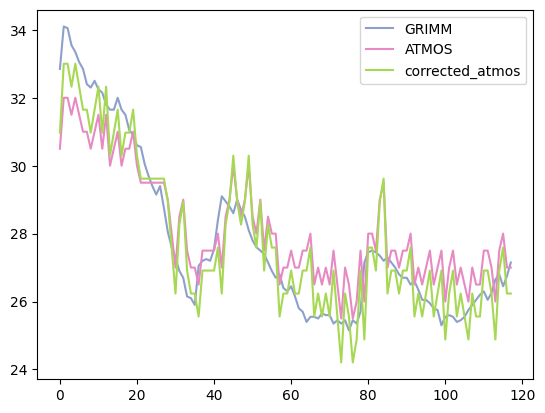

In [28]:
sns.lineplot(data=df[['GRIMM','ATMOS','corrected_atmos']], palette=sns.color_palette("Set2")[2:5], dashes=False)

Atmos is the most corrected out of the box. 

<Axes: >

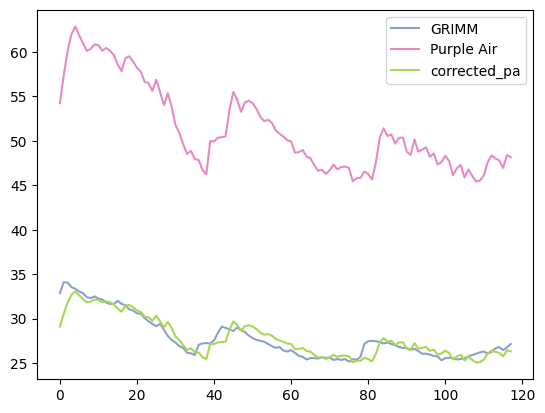

In [29]:
sns.lineplot(data=df[['GRIMM','Purple Air','corrected_pa']], palette=sns.color_palette("Set2")[2:5], dashes=False)

<Axes: >

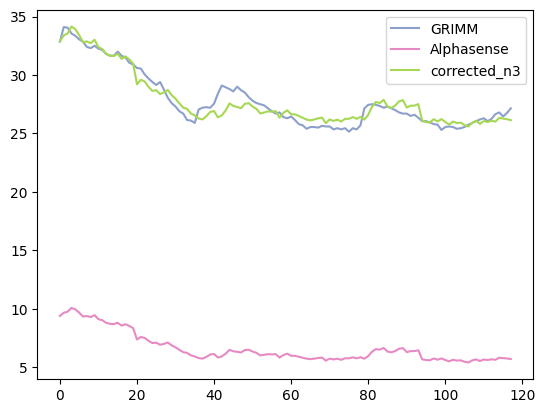

In [30]:
sns.lineplot(data=df[['GRIMM','Alphasense','corrected_n3']], palette=sns.color_palette("Set2")[2:5], dashes=False)

In [31]:
df.to_csv('LR_Data_PM_1.csv')

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('BEFORE CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['ATMOS']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['Purple Air']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('AFTER CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['corrected_pa']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_n3']) :.3f}")



BEFORE CORRECTION
--------------------------------------------
MAE ATMOS     :  0.979
MAE Purple Air:  23.572
MAE OPC N3    :  21.185


R2 ATMOS     :  0.762
R2 Purple Air:  -96.157
R2 OPC N3    :  -76.681


MAPE ATMOS     :  0.035
MAPE Purple Air:  0.848
MAPE OPC N3    :  0.764


AFTER CORRECTION
--------------------------------------------
MAE ATMOS     :  0.748
MAE Purple Air:  0.677
MAE OPC N3    :  0.581


R2 ATMOS     :  0.842
R2 Purple Air:  0.854
R2 OPC N3    :  0.908


MAPE ATMOS     :  0.027
MAPE Purple Air:  0.024
MAPE OPC N3    :  0.021
